In [204]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0b0c8710>)

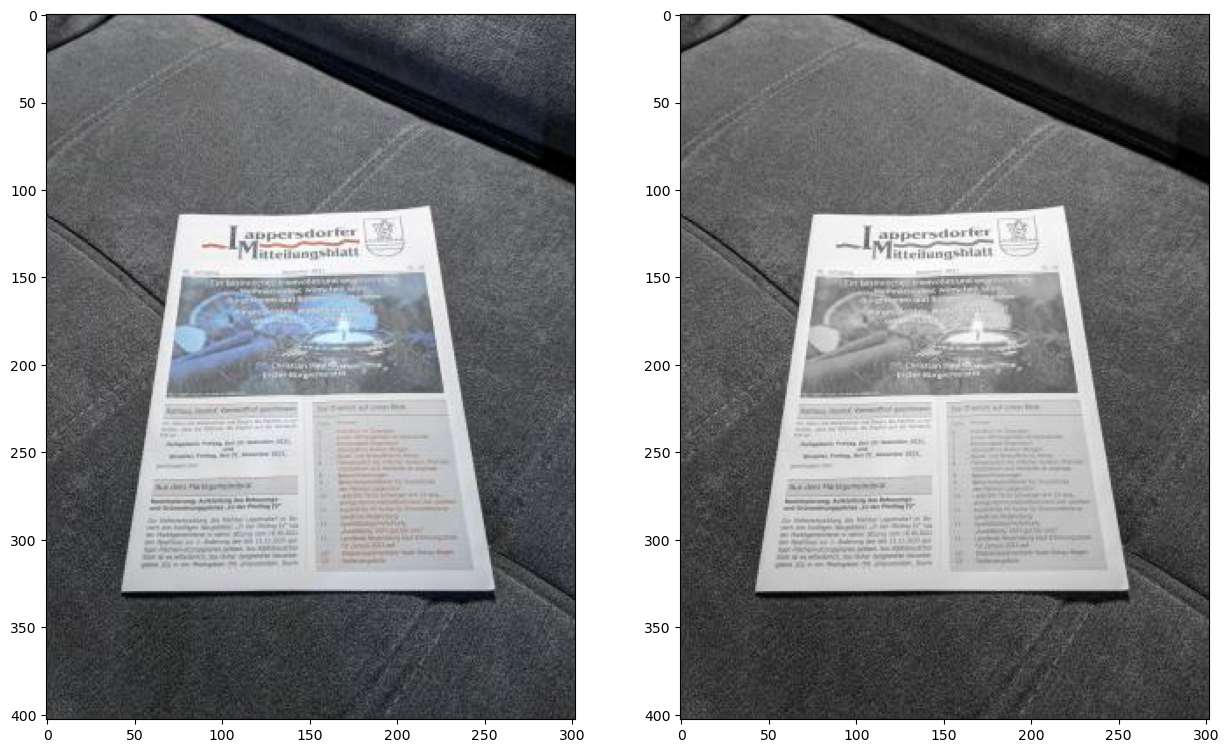

In [206]:
img = cv2.imread('data/document.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [207]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0b7c0b90>)

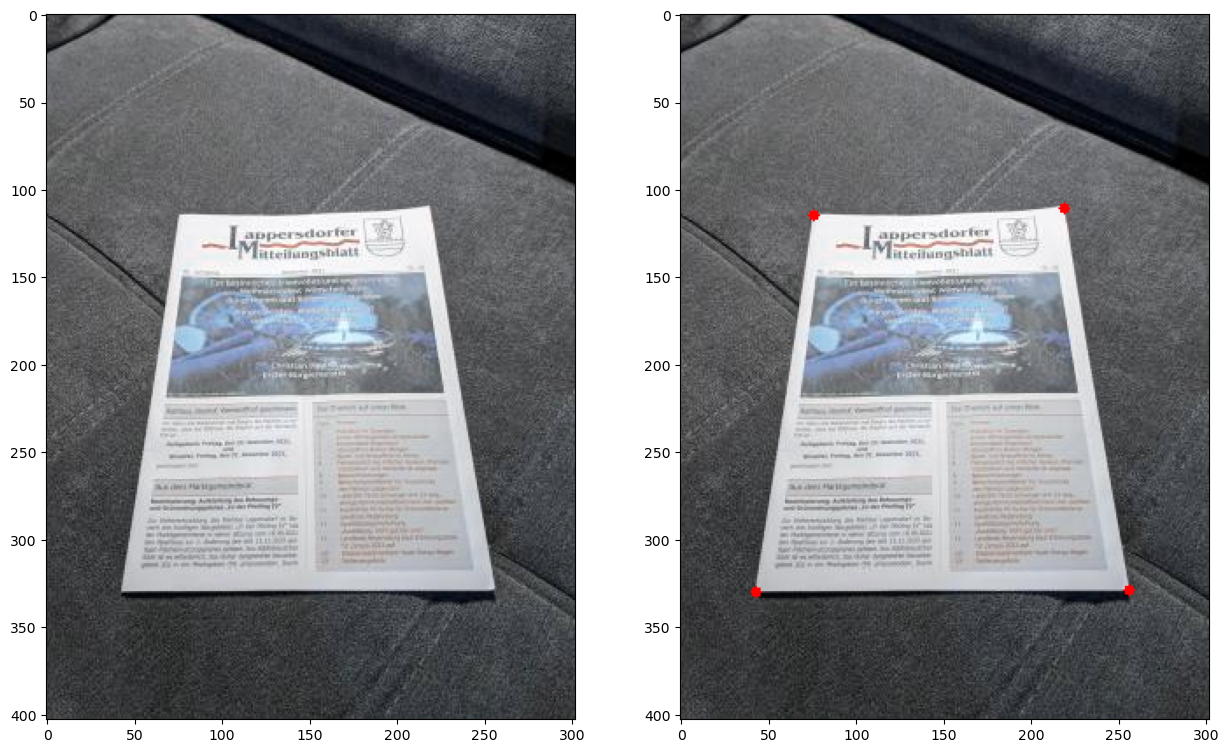

In [208]:
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [212]:
src = np.array([[76, 115],[219, 111],[43, 330],[256, 329]], dtype=np.float32)

In [214]:
print(src)

[[ 76. 115.]
 [219. 111.]
 [ 43. 330.]
 [256. 329.]]


In [216]:
dst = np.array([[43,111],[256,111],[43,330],[256,330]], dtype=np.float32)
print(dst)

[[ 43. 111.]
 [256. 111.]
 [ 43. 330.]
 [256. 330.]]


In [218]:
src_1 = np.float32([[ 76, 115],
                    [219, 111],
                    [ 43, 330]])
dst_1 = np.float32([[43, 111],
                    [256,111],
                    [43, 330]])
M = cv2.getAffineTransform(src_1, dst_1)
print(M)

[[ 1.49593310e+00  2.29608336e-01 -9.70958743e+01]
 [ 2.86152942e-02  1.02299677e+00 -8.81939046e+00]]


In [220]:
dst_img = cv2.warpAffine(img, M, (cols, rows))

(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0a71a7d0>)

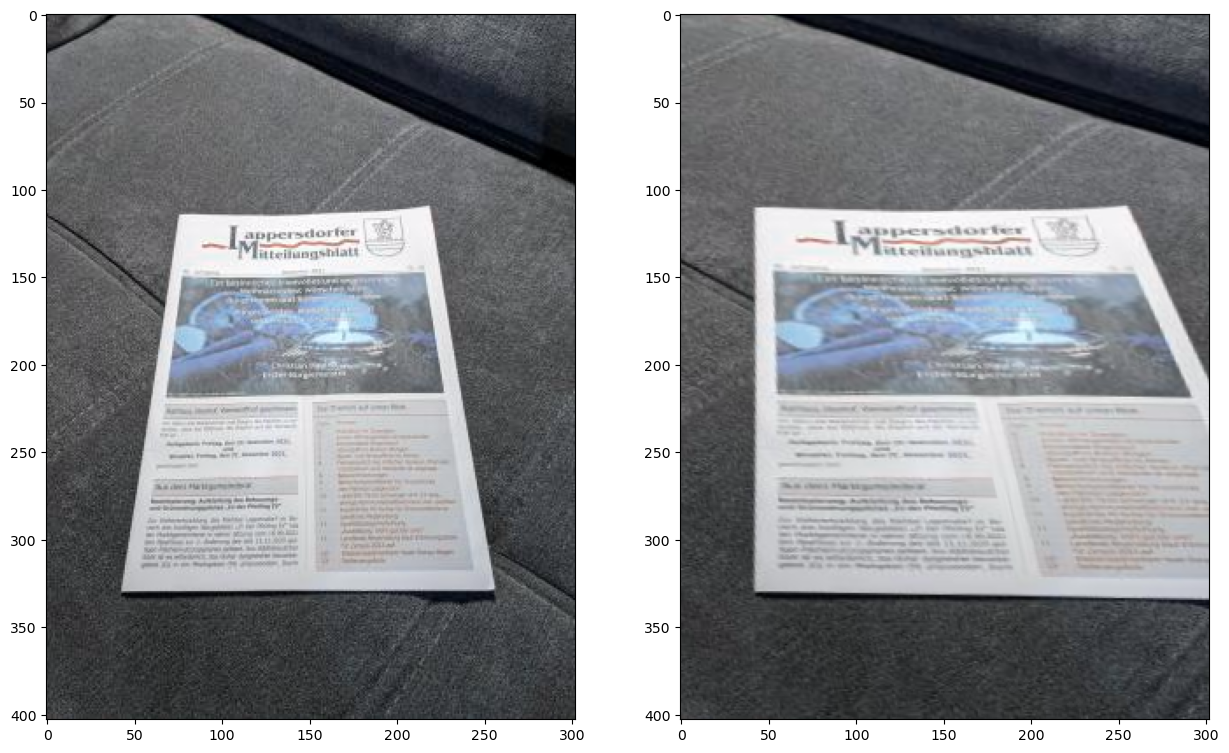

In [222]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst_img)

In [223]:
src_1 = np.float32([[219, 111],
                   [ 43, 330],
                   [256, 329]])
dst_1 = np.float32([[256,111],
                    [43, 330],
                    [256,330]])
M = cv2.getAffineTransform(src_1, dst_1)
print(M)

[[ 9.99203805e-01 -1.69589637e-01  5.59988165e+01]
 [ 4.71261647e-03  1.00378731e+00 -1.45245422e+00]]


In [224]:
dst_img = cv2.warpAffine(img, M, (cols, rows))

(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0ac43810>)

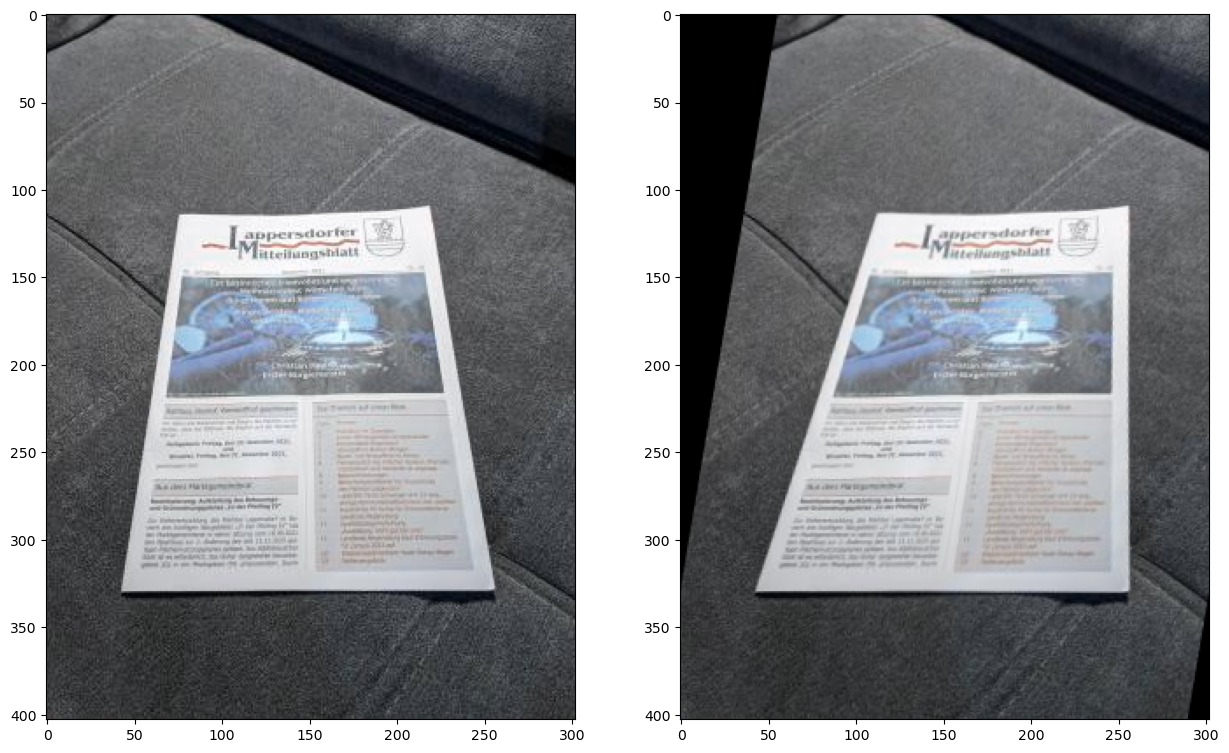

In [225]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst_img)

In [229]:
M, inliers = cv2.estimateAffine2D(src, dst)

In [232]:
print(M)
print(inliers)

[[ 1.48247238e+00 -2.51612285e-01 -4.07324883e+01]
 [ 2.79675627e-02  9.99840368e-01 -6.10717706e+00]]
[[1]
 [1]
 [0]
 [1]]


(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0a644090>)

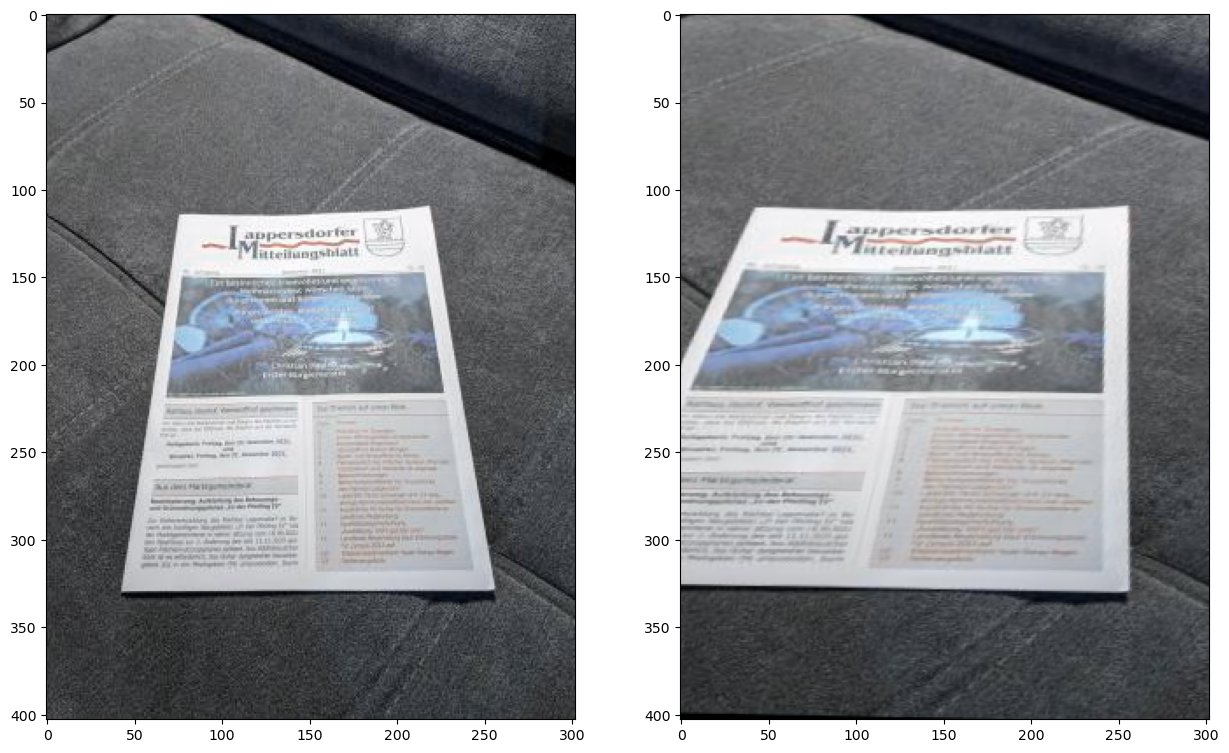

In [234]:
rectified = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

In [236]:
M = cv2.getPerspectiveTransform(src, dst)

In [238]:
rectified  = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

(<Axes: >, <matplotlib.image.AxesImage at 0x7efd0a5dae50>)

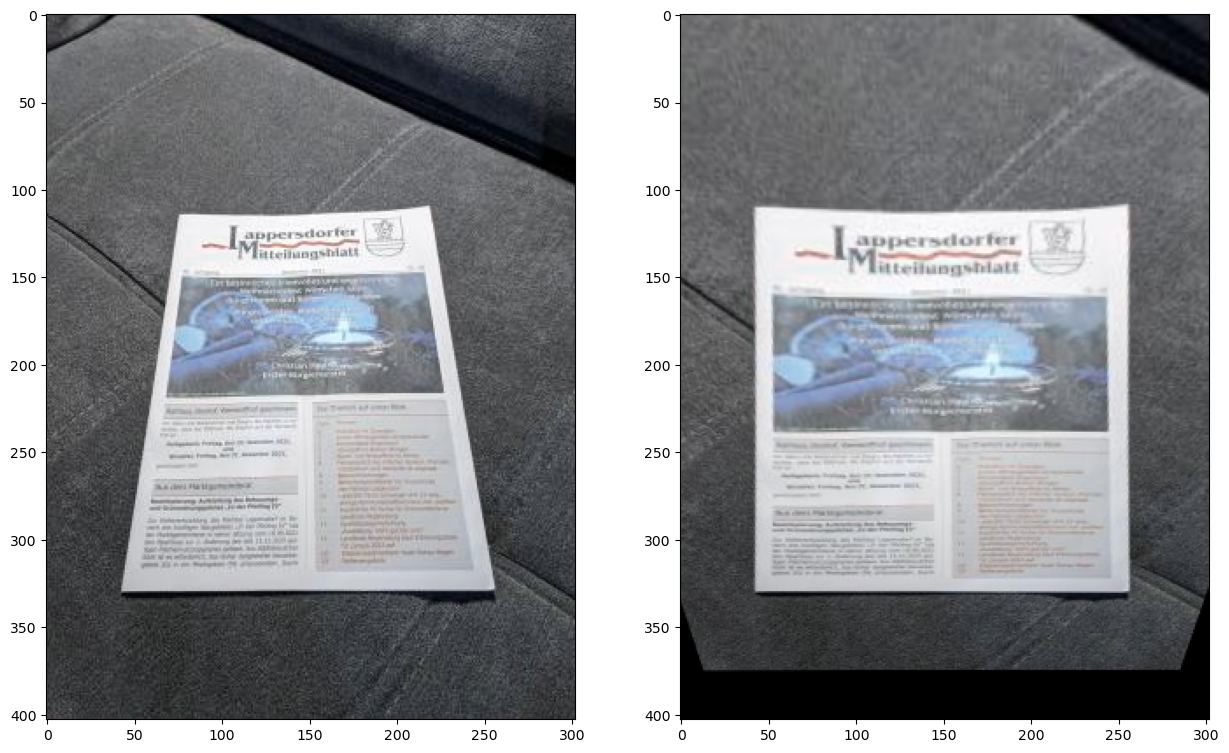

In [240]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

In [242]:
#The affine transform does not seem to be working well in this case. Why?
# Аффинное преобразование может перемещать, вращать, сжимать/ростягивать,но сохранять параллельность. Для исправления перспективы
# это не подходит
#What can you tell me about the values you have obtained for the inliers vector? What does it mean?
# 1 - соответствует точкам, которые остаются внутри картинки, 0 - уходят за пределы
#How does the result from homography look? Does it work well enough?
# Мне нравится)
